# Object Detection

### Prepare data (the raccoon dataset)

git clone https://github.com/datitran/raccoon_dataset

Modify the following py files if necessary:  
xml_to_csv.py  
generate_tfrecord.py 

> cd raccoon_dataset  

> python xml_to_csv.py  # generate the label.csv file  
> python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record  
> python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record

### Train

Modify ssd_mobilenet_v1_pets.config  
original config files are located at models/research/object_detection/samples/configs/


> python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v1_pets.config

[Encountered Error]
tensorflow.python.framework.errors_impl.NotFoundError: Can not get size for:  : ϵͳ\udcd5Ҳ\udcbb\udcb5\udcbdָ\udcb6\udca8\udcb5\udcc4·\udcbe\udcb6\udca1\udca3
; No such process  
[Solution] This is caused by mispelling,  
e.g. python train.py --logtostderr --train_dir=training/ --pipelie_config_path=training/ssd_mobilenet_v1_pets.config

### Tensorboard to check the training process

> cd training  
> tensorboard --logdir=.

Should see the loss line drops
<img src="raccoon_dataset/training/tensorboard.png">

#### Warning: this TensorFlow binary was not compiled to use: AVX AVX2

Advanced Vector Extensions (AVX) are extensions to the x86 instruction set architecture for microprocessors from Intel and AMD proposed. 
In particular, AVX introduces fused multiply-accumulate (FMA) operations, which speed up linear algebra computation, namely dot-product, matrix multiply, convolution, etc. Almost every machine-learning training involves a great deal of these operations, hence will be faster on a CPU that supports AVX and FMA (up to 300%).  

Recommendation: Ignore the warning or use GPU

### Export ckpt to graph

> python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/ssd_mobilenet_v1_pets.config --trained_checkpoint_prefix training/model.ckpt-4523 --output_directory training  

After this step, a "frozen_inference_graph.pb" file is generated.

[Encountered Error] ValueError: Protocol message RewriterConfig has no "layout_optimizer" field.  
[Solution] Change "layout_optimizer" to "optimize_tensor_layout" in Line 72 of exporter.py  
Or revise "rewrite_options = rewriter_config_pb2.RewriterConfig(
             layout_optimizer=rewriter_config_pb2.RewriterConfig.ON)"  
to "rewrite_options = rewriter_config_pb2.RewriterConfig()"



### Object Detection Using the Finetuned Model

In [1]:
from odn import utils

detection_graph, category_index = utils.load_tf_graph(ckpt_path = '../data/raccoon/training/frozen_inference_graph.pb',
                 label_path = '../data/raccoon/training/raccoon_label_map.pbtxt', 
                 num_classes = 1, verbose = True)



category_index:  {1: {'id': 1, 'name': 'raccoon'}}


### 批量处理

In [2]:
import os

PATH_TO_TEST_IMAGES_DIR = '../data/raccoon/test_images'
FILES = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 11) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

FILES

['../data/raccoon/test_images\\image1.jpg',
 '../data/raccoon/test_images\\image2.jpg',
 '../data/raccoon/test_images\\image3.jpg',
 '../data/raccoon/test_images\\image4.jpg',
 '../data/raccoon/test_images\\image5.jpg',
 '../data/raccoon/test_images\\image6.jpg',
 '../data/raccoon/test_images\\image7.jpg',
 '../data/raccoon/test_images\\image8.jpg',
 '../data/raccoon/test_images\\image9.jpg',
 '../data/raccoon/test_images\\image10.jpg']

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

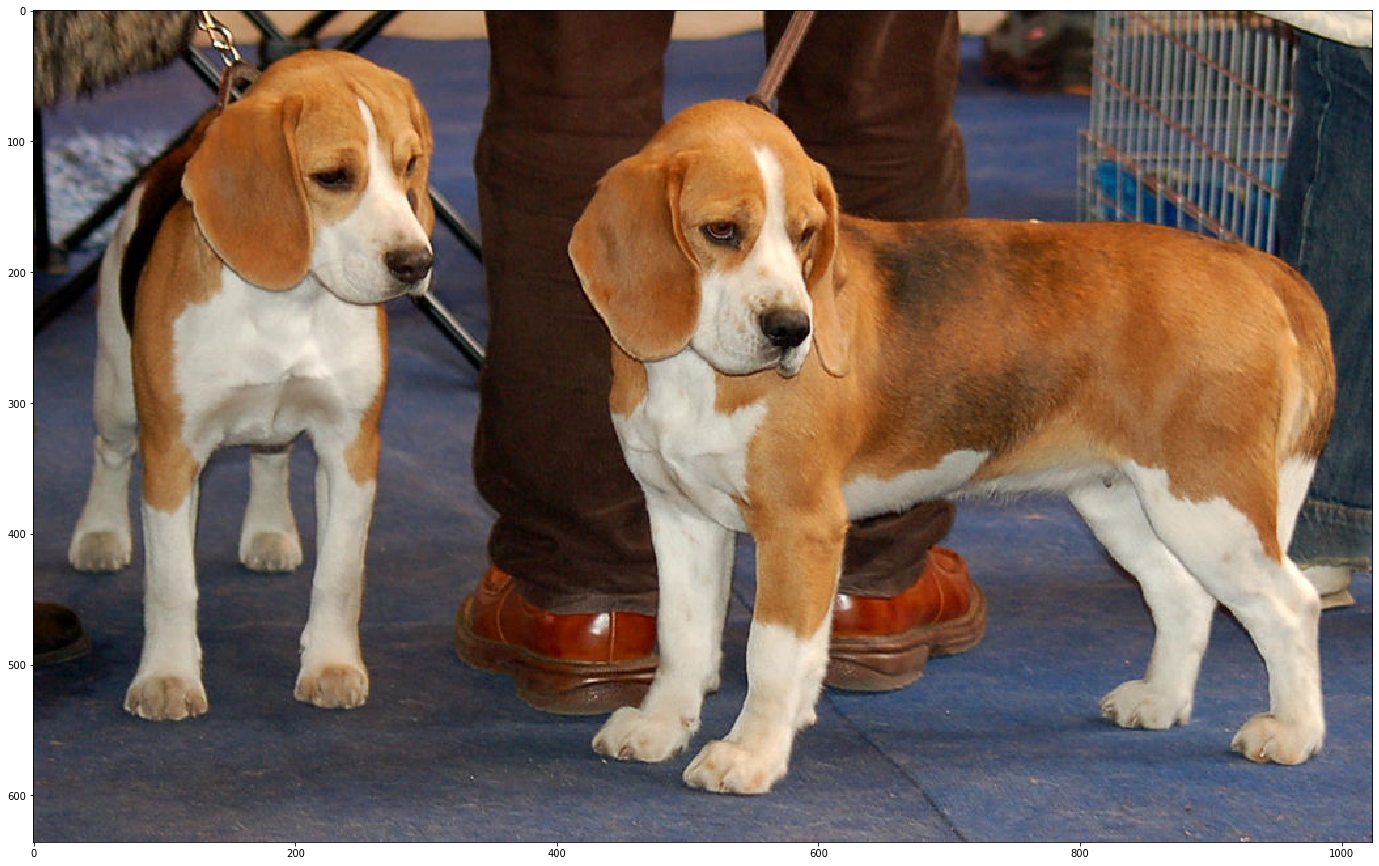

 10%|████████▎                                                                          | 1/10 [00:03<00:30,  3.41s/it]

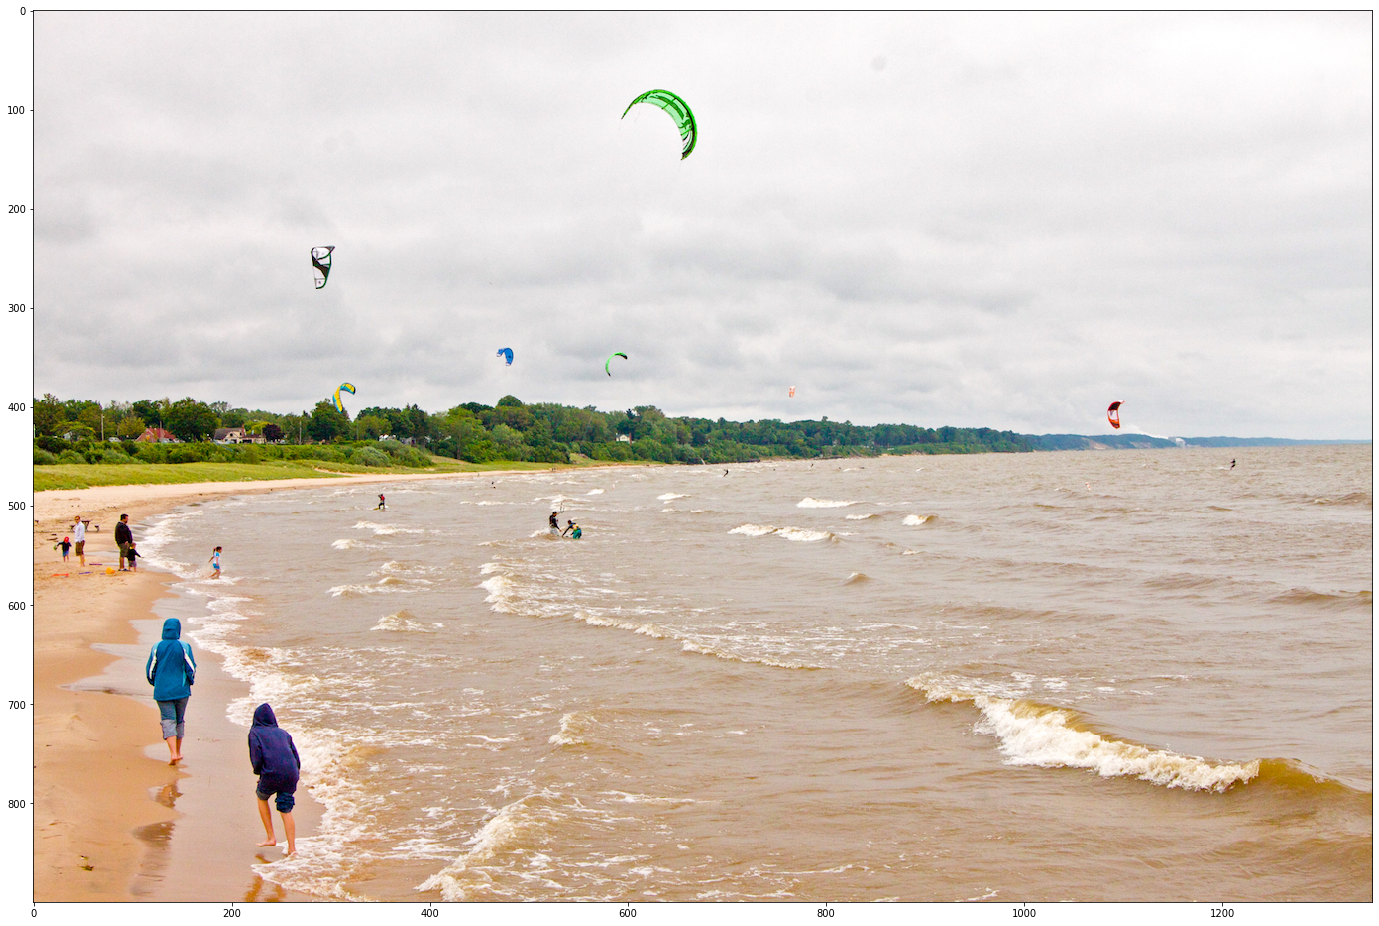

 20%|████████████████▌                                                                  | 2/10 [00:06<00:25,  3.24s/it]

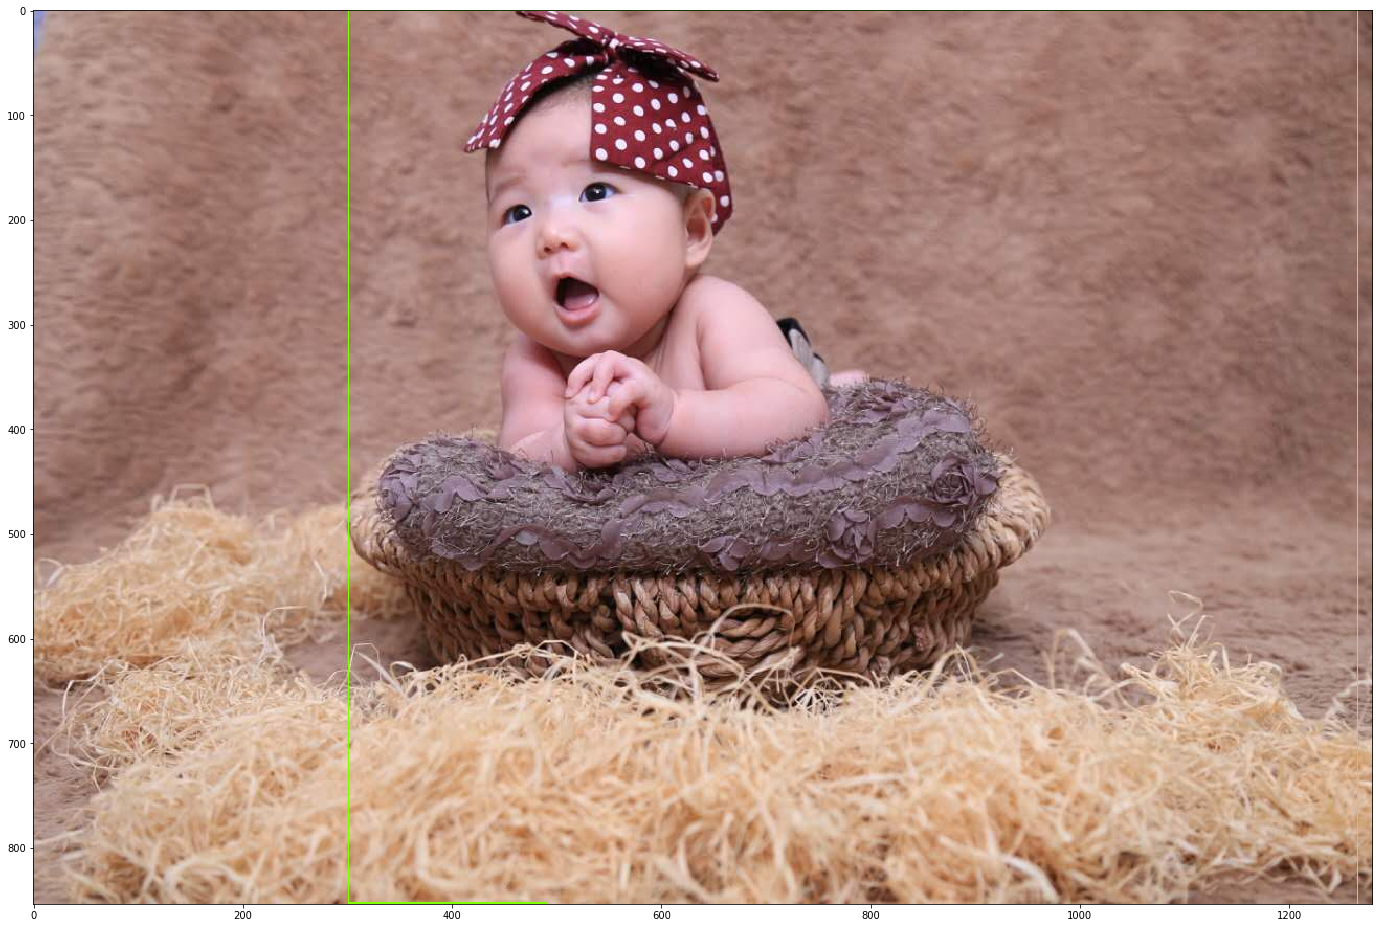

 30%|████████████████████████▉                                                          | 3/10 [00:08<00:20,  2.98s/it]

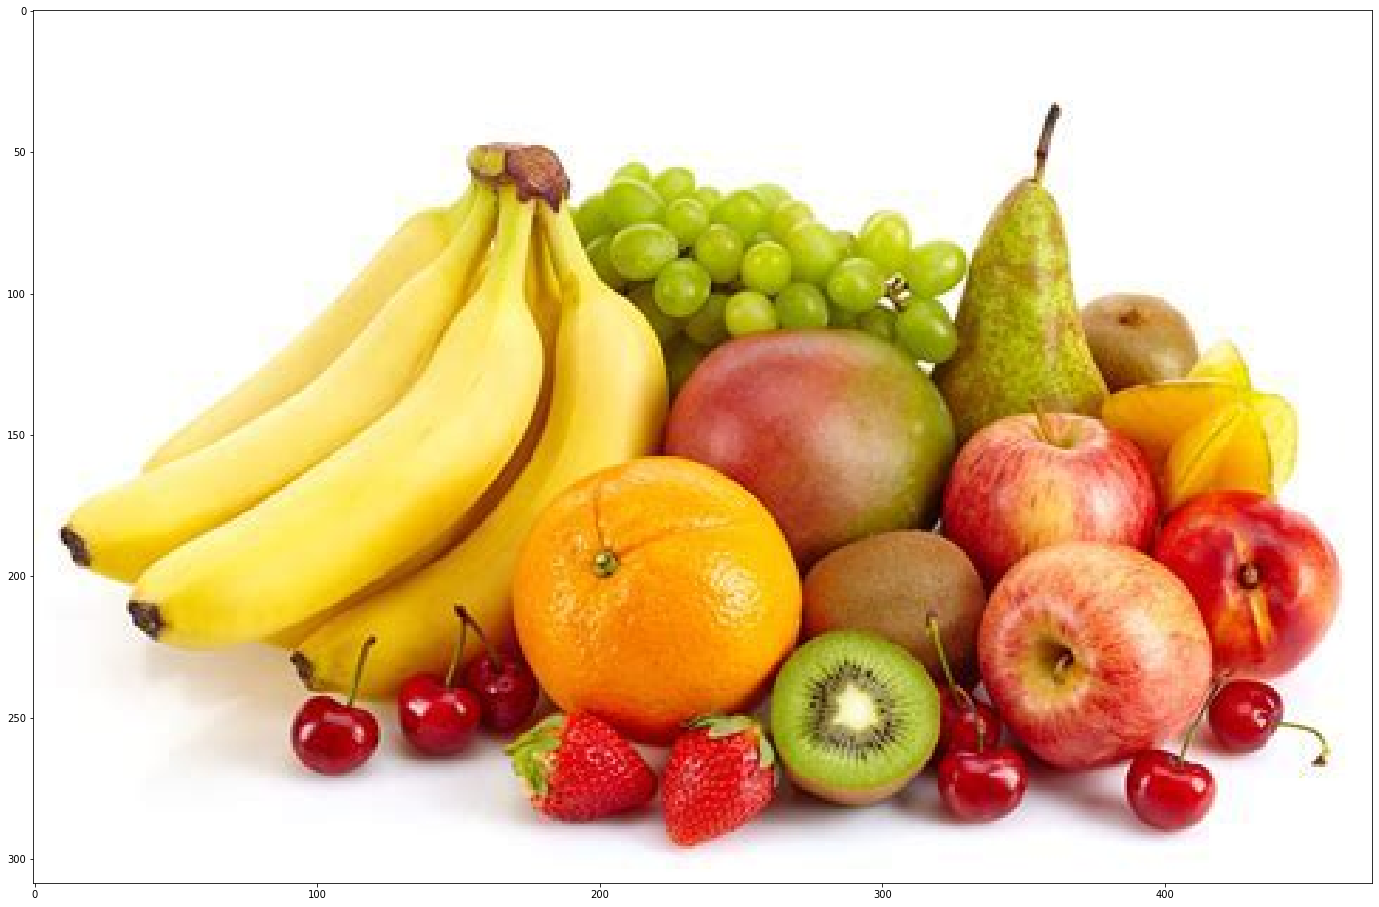

 40%|█████████████████████████████████▏                                                 | 4/10 [00:09<00:13,  2.25s/it]

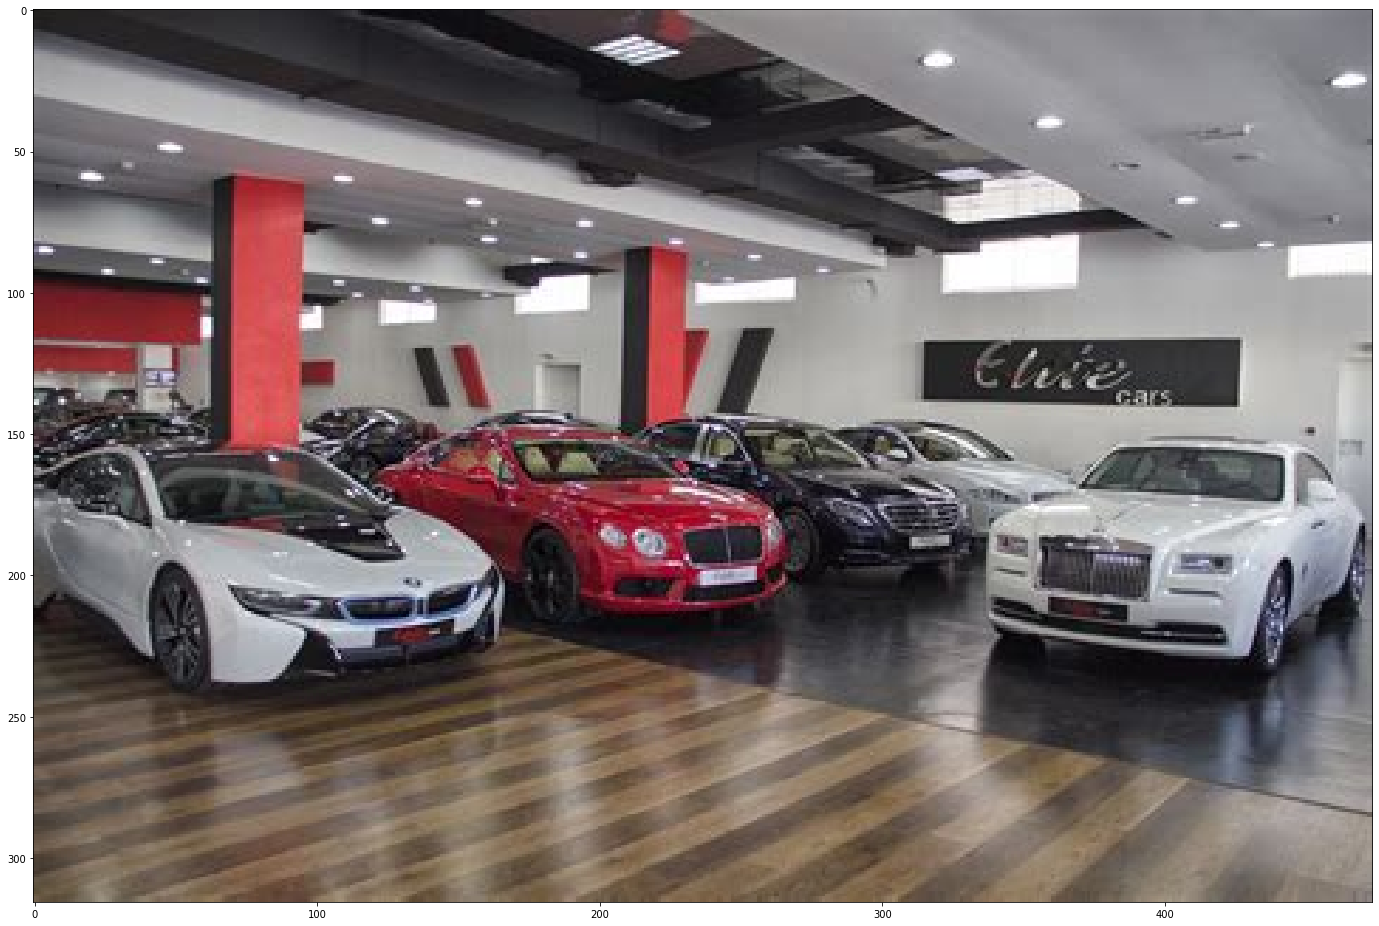

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:09<00:08,  1.76s/it]

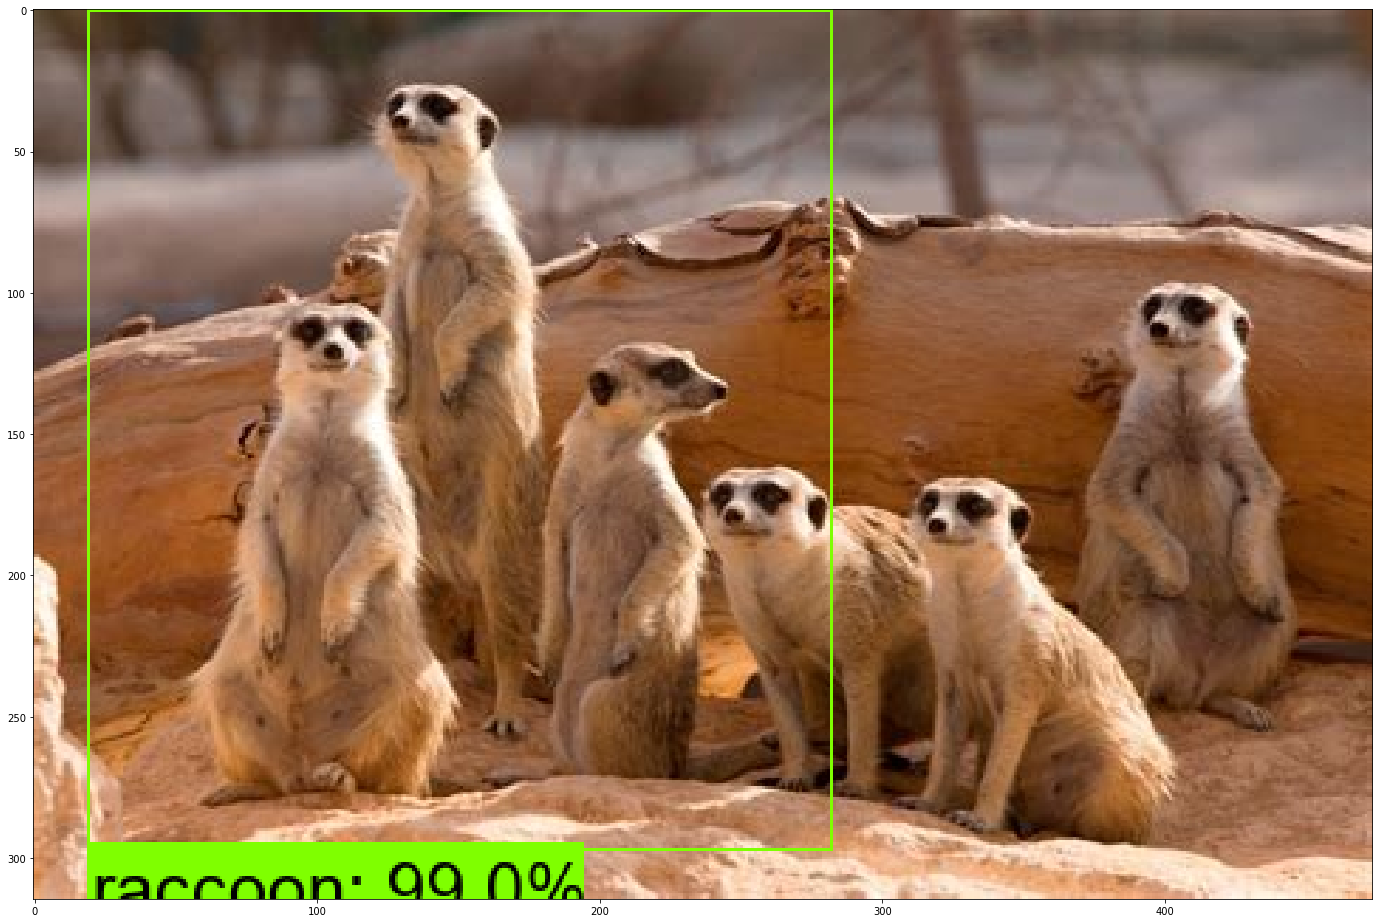

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:10<00:05,  1.44s/it]

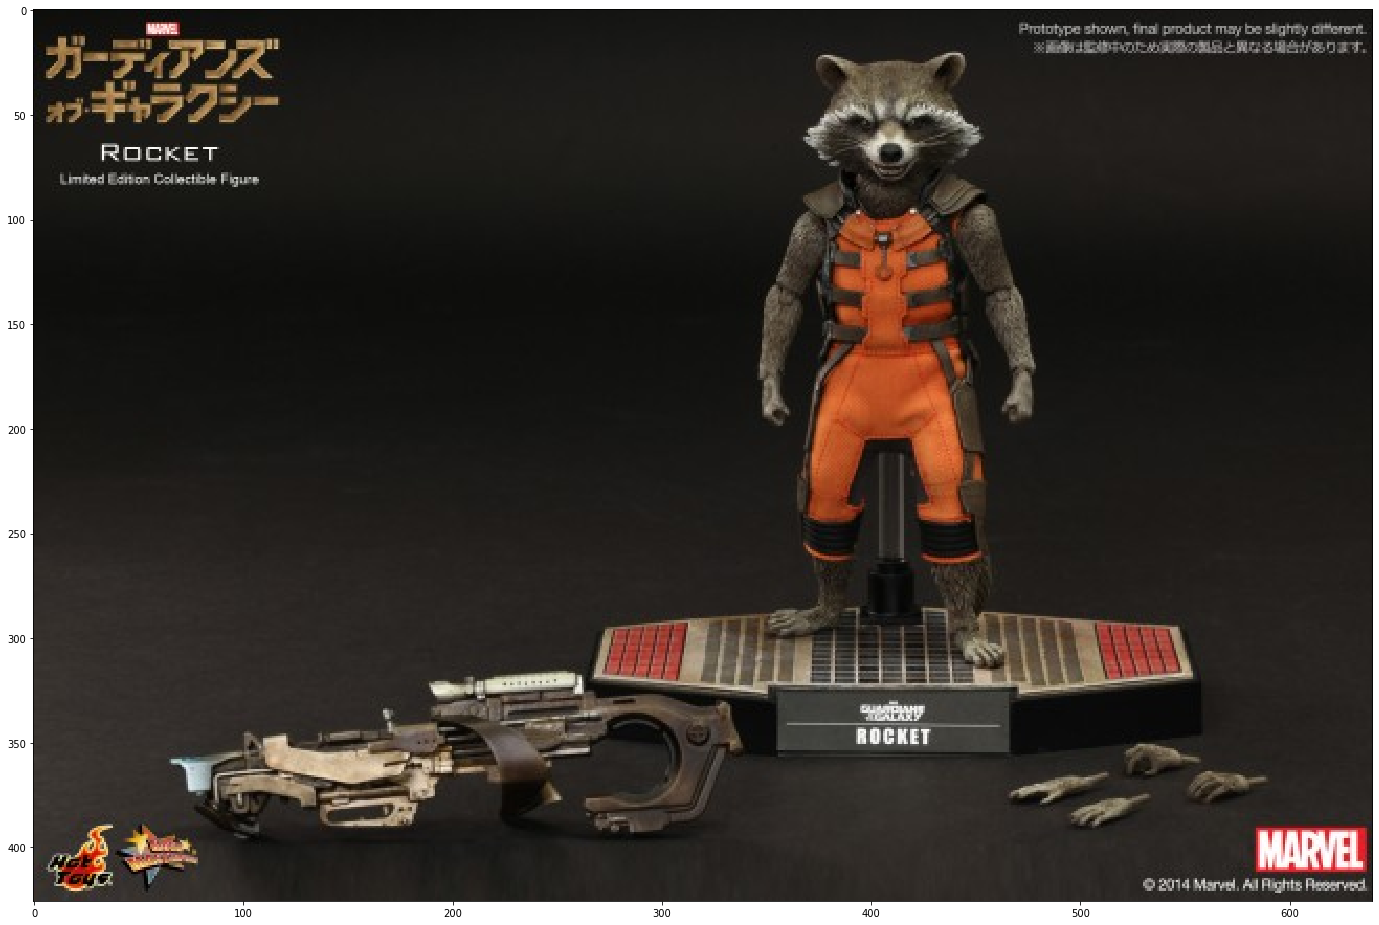

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:11<00:03,  1.29s/it]

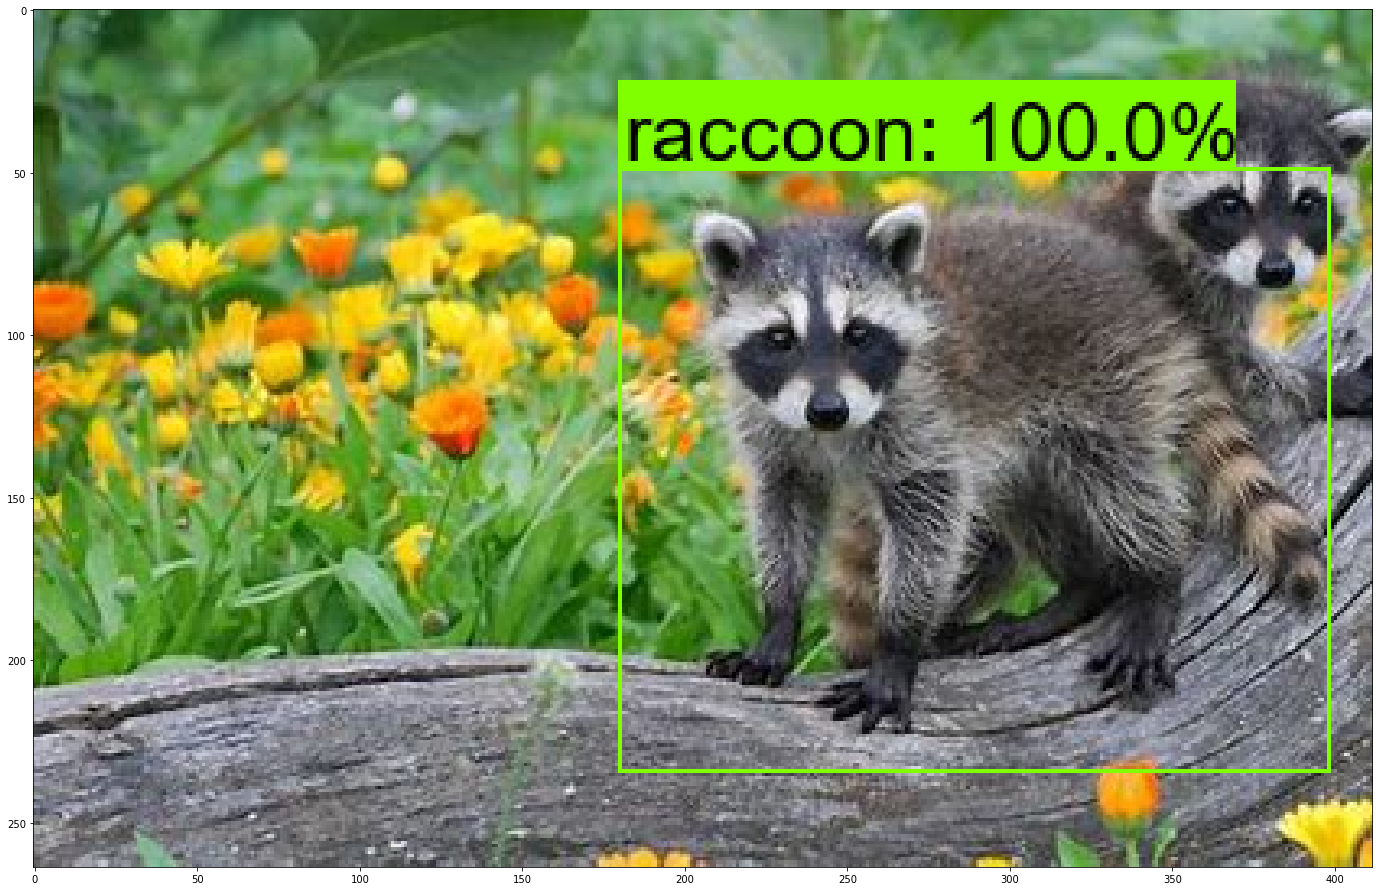

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:11<00:02,  1.07s/it]

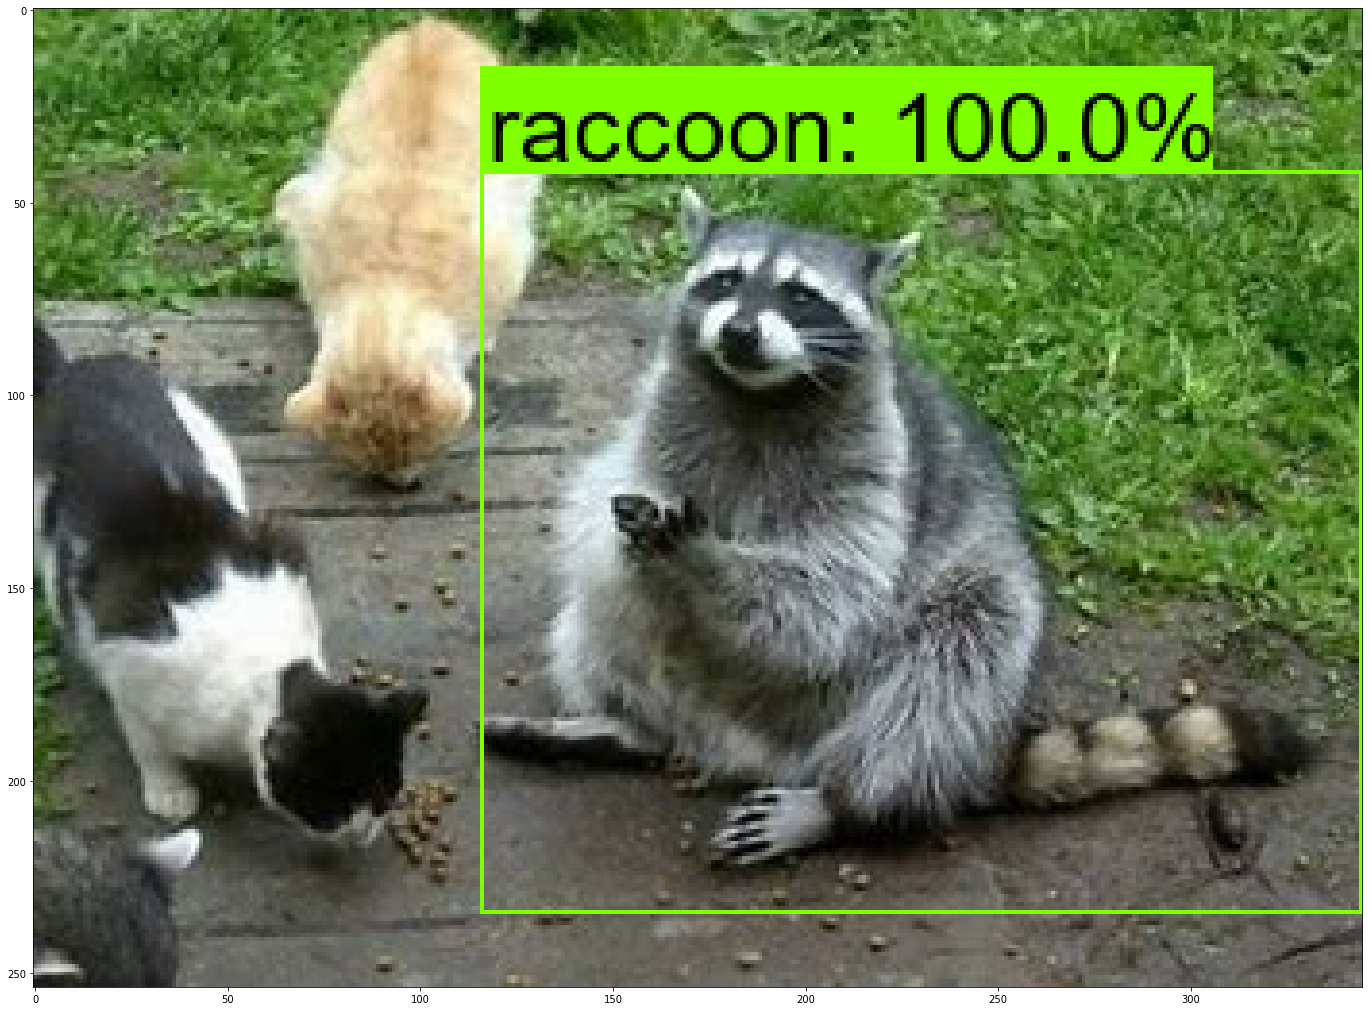

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:12<00:00,  1.11it/s]

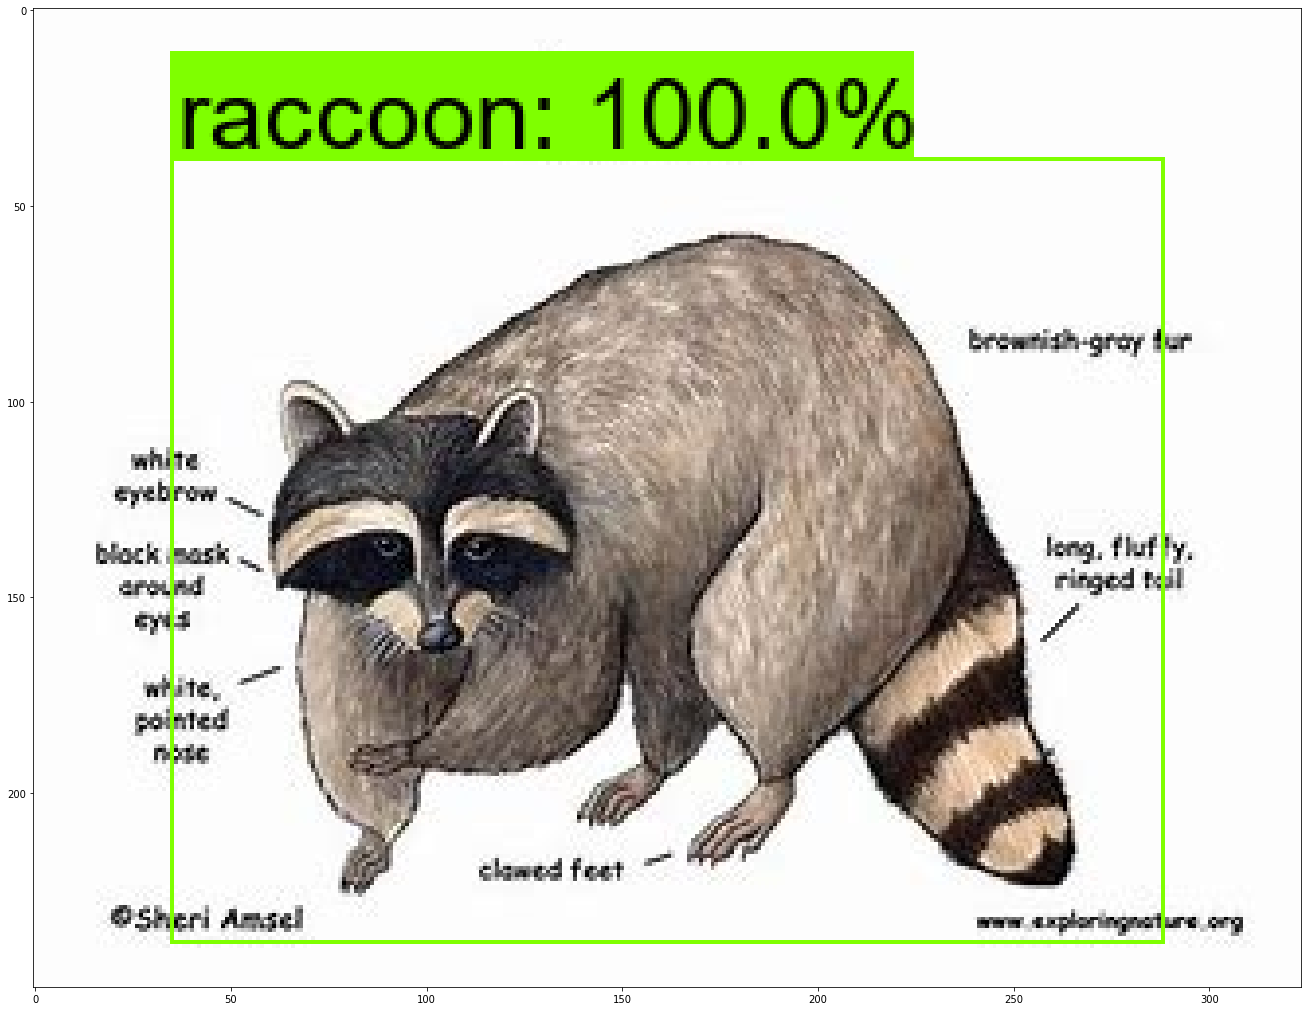

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.30s/it]


In [5]:
from odn import utils
%matplotlib inline

utils.tf_batch_object_detection(detection_graph, category_index, FILES, 
                            target_folder = None, log_file = None,
                            display = True, savefile = False, 
                            IMAGE_SIZE = (24, 18), threshold = 0.9, 
                            new_img_width = None,
                            fontsize = None)